In [ ]:
import pandas as pd # manipulacion de dataframes
import numpy as np # matrices y vectores
import matplotlib.pyplot as plt # graficar

In [ ]:
data=pd.read_excel('resultados_Kmeans.xlsx')
data

,Unnamed: 0,color,talla,promedio_ventas_2025,total_ventas_2025,tipo_prenda,cluster
0,0,NEGRO,S,77.750,622,F,13
1,1,NEGRO,M,55.250,442,F,2
2,2,NEGRO,UNI,59.750,478,EX,9
3,3,BEIGE,S,114.375,915,F,6
4,4,BEIGE,2XS,14.875,119,C,5
...,...,...,...,...,...,...,...
1229,1229,BEIGE,XL,13.500,108,M,7
1230,1230,BEIGE,XS,0.125,1,F,1
1231,1231,NEGRO,L,0.375,3,C,8
1232,1232,BEIGE,S,13.875,111,B,6


In [ ]:
num_colors = data['color'].nunique()
num_tallas = data['talla'].nunique()
num_prendas = data['tipo_prenda'].nunique()

print(f"Number of unique colors: {num_colors}")
print(f"Number of unique sizes: {num_tallas}")
print(f"Number of unique sizes: {num_prendas}")

Number of unique colors: 8
Number of unique sizes: 13
Number of unique sizes: 22


In [ ]:
color_counts = data['color'].value_counts()
print("Counts for each color:")
print(color_counts)

In [ ]:
data.drop(columns='Unnamed: 0',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 1234 non-null   object 
 1   talla                 1234 non-null   object 
 2   promedio_ventas_2025  1234 non-null   float64
 3   total_ventas_2025     1234 non-null   int64  
 4   tipo_prenda           1234 non-null   object 
 5   cluster               1234 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 58.0+ KB


In [ ]:
data= pd.get_dummies(data,columns=['color','talla','tipo_prenda'],drop_first=False,dtype=int) #
data.head()

,promedio_ventas_2025,total_ventas_2025,cluster,color_AZUL,color_BEIGE,color_BLANCO,color_GRIS,color_NEGRO,color_ROSADO,color_SAHARA,...,tipo_prenda_M,tipo_prenda_MA,tipo_prenda_MD,tipo_prenda_PL,tipo_prenda_S,tipo_prenda_STA,tipo_prenda_STB,tipo_prenda_SXA,tipo_prenda_T,tipo_prenda_TA
0,77.750,622,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55.250,442,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59.750,478,9,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,114.375,915,6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.875,119,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='cluster'>

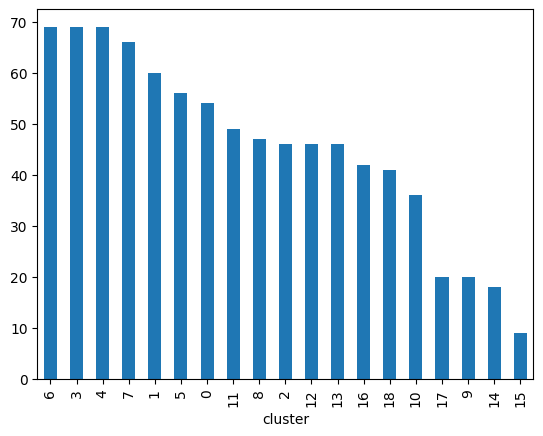

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("cluster", axis = 1) # Variables predictoras
Y = data['cluster'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='cluster'>

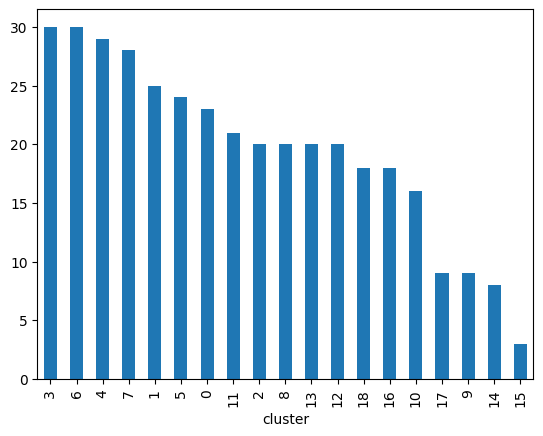

In [ ]:
# Se puede observar una tendencia similar de los datos de entrenamiento al de los de prueba,
#gracias al uso del muestreo estratificado
Y_test.value_counts().plot(kind='bar')

In [ ]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier

modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, max_depth=8,random_state=42) #gini, entropy.
#El criterio es la medida de evaliacion para regresion es mse,etc
modelTree.fit(X_train, Y_train) #70% train


DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=42)

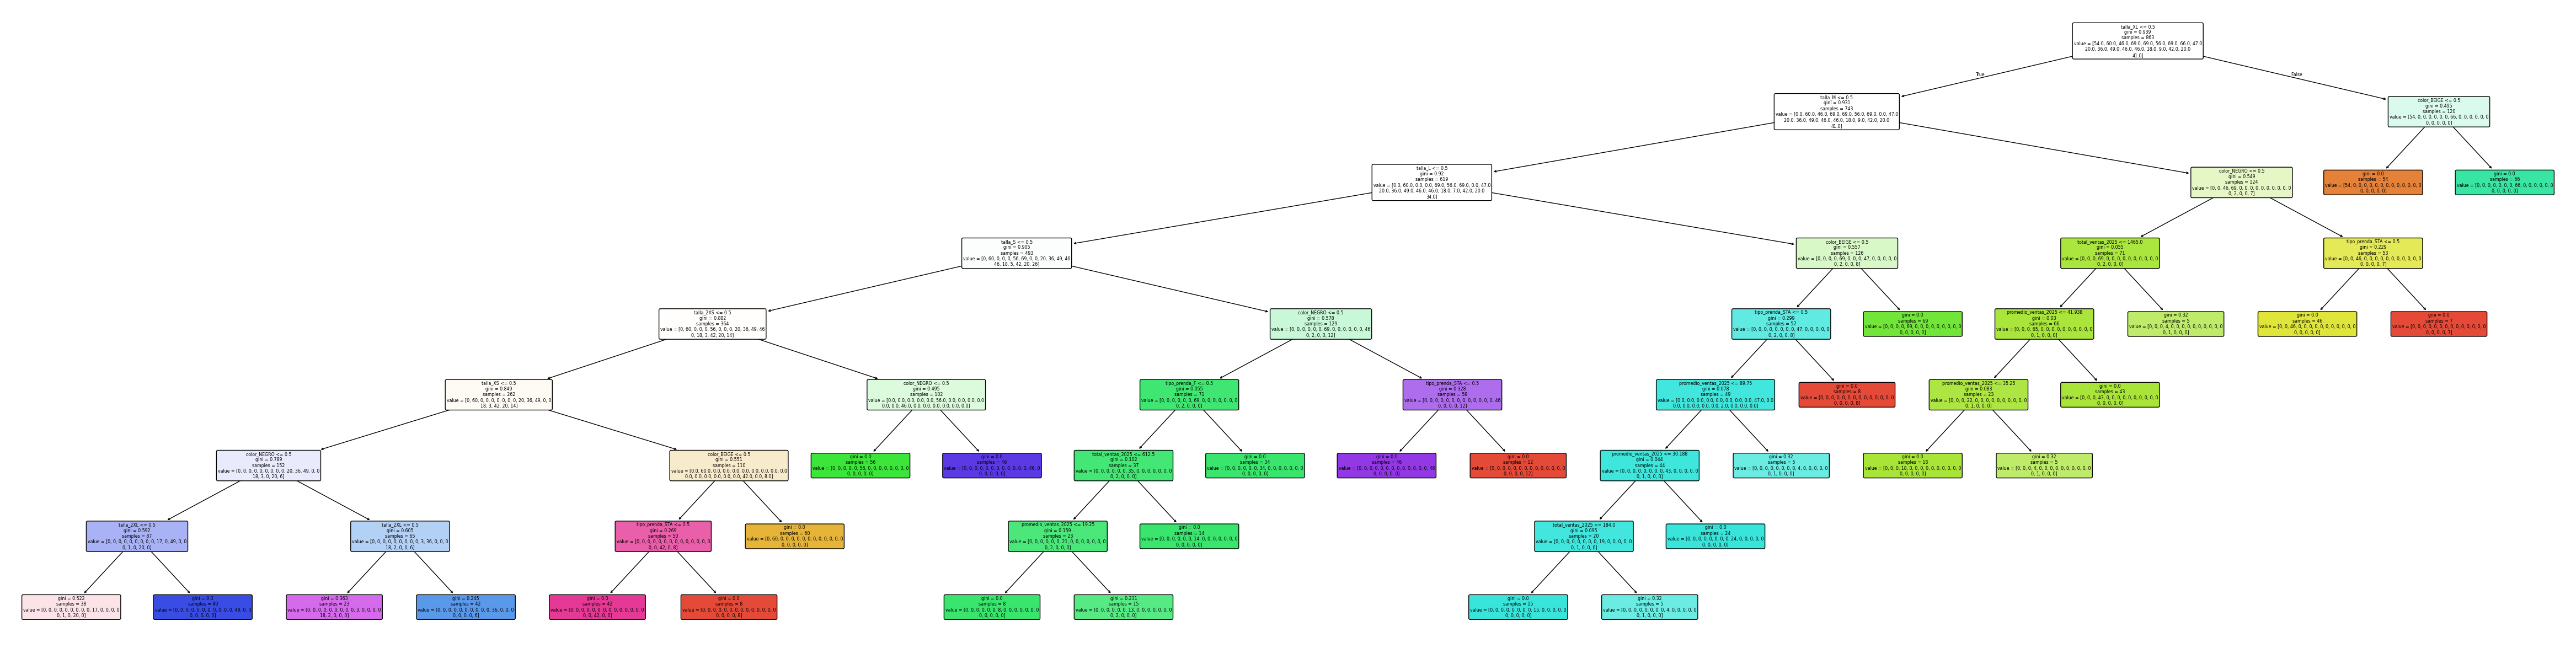

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,15))
plot_tree(modelTree, feature_names=X_train.columns.values, rounded=True, filled=True)
plt.show()


In [ ]:
#Evaluación 30%
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30% Test
print(Y_pred)

[ 3  2  8 18 17  5  3 13  7  6 18  2 16  4  3  1  6  4 14  4  7  1 10 10
 10 16  4 18  3  8  3  7 14  0  0  1 18 18  2  0  6  3  7  1 16 14  2  7
  4 13 10  5 13 11  6 12  2  8  0  2  4 14  6  7 16 12 12  2 11 18  0 11
 11 11  8  6 13  7  6 13  0  8 17  7 12  4 13  1 17 18  6  0  1  3 10 10
  5  1 14 14 11  7 14 12 14 16  5  2 17 11  3  4  3 18  4  8 16  3  6  2
  2  0  7 12 18  7 11  7 16  1 12  0  5  3  8  3 10  4 13  4  8 16  6 12
 14  6  6  1 16 16  6 10 10  1 17 10  1  7  4 11 11 12  1  3  4 17 11  3
  2  7  5  5  3  1 12 17  8 16  7  8 13 11 12 16  7 12  2  5 17  6 17  0
  5 17 14  8  1  4 12  0 11 16  6  4  5  3 11  7 14  3  1  3 12  1  4  3
 17 10  5 16  7 13  8 18  4  0  0 18  5  6  6  4 13  1  7  7  6 12  6  7
 17  1  8  2  3 16  5 12 17  3 18 13  0  0  5 12  6 13 18  2  5 17  4  4
 17 13  0  0 18  0  8  3  4 10  3 13 10  3  3  7  2 18  2  1  2  4  0  6
  5 17  6 13  0  8 14  6  2  0  8  0 11  3 17  6  6 11  3 11 12  5  1  0
  7  7 10 18  8 12  5 16 16  8 13 11  4  3  8  5 13

In [ ]:
#Exactitud
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.9595687331536388


In [ ]:
#Matriz de confusion
from sklearn import metrics

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
cm

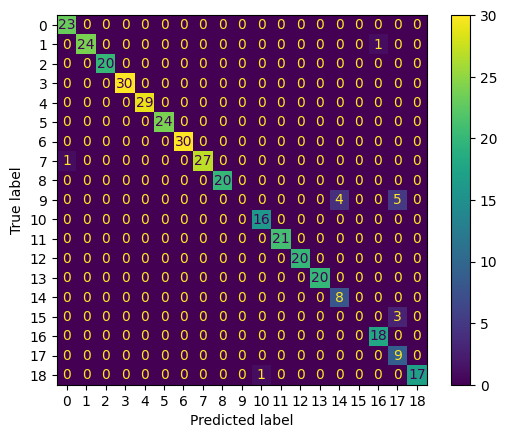

In [ ]:
#Plot de la matriz de confusion
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        30
           7       1.00      0.96      0.98        28
           8       1.00      1.00      1.00        20
           9       0.00      0.00      0.00         9
          10       0.94      1.00      0.97        16
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       0.67      1.00      0.80         8
          15       0.00      0.00      0.00         3
          16       0.95      1.00      0.97        18
          17       0.53    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
